<a href="https://colab.research.google.com/github/RashmitVartak/DAV/blob/main/DAV_Exp3_63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment - 3 :Multiple Linear Regression in Python**


Name:Rashmit Vartak

Div: D11AD

Rollno:63

**Title of Experiment**:Multiple Linear Regression in Python

**Outcome of Experiment :**
Implement various Regression techniques for prediction. (LO2)

**Task to be performed :**

1)List the packages to be used for Multiple Linear Regression in Python

2)Download the dataset from UCI Repository / Kaggle

-- Load data into Google Colab

-- Display the summary of the dataset

3)Create a model and fit it

4)Get the values : Coefficient of Determination, Intercept and Coefficients

5)Predict the response

6)Visualize the results with a graph

7)Repeat the steps 2 to 6 using R libraries


**Theory :** Referred from https://github.com/pramodini18/Car-Price-Prediction/tree/master

#Python

In [82]:
#importing the libraries


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


%matplotlib inline

#Tried MLR with a dataset


 Where I came to know that the independent variables are dependent on each other

In [69]:
df = pd.read_csv("/content/multiple_linear_regression_dataset.csv")
#   LINK OF DATASET : https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [70]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


Identifying dependent and independent variable

In [72]:
# Load the dataset
df = pd.read_csv('/content/multiple_linear_regression_dataset.csv')

# Assuming 'target' is the dependent variable
target_variable = 'age'

# Calculate correlations with the target variable
correlations = df.corr()[[target_variable]]

# Display the correlation values
print(correlations)

                 age
age         1.000000
experience  0.615165
income      0.532204


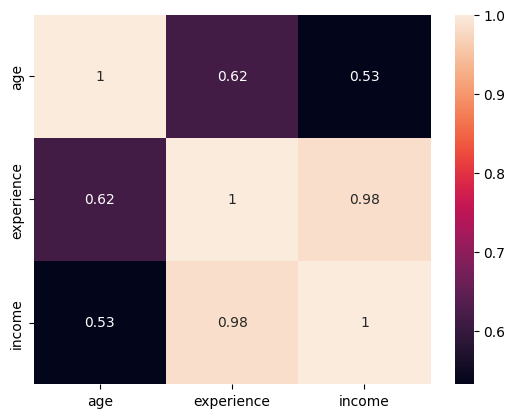

In [73]:
sns.heatmap(df.corr(),annot=True)
plt.show()

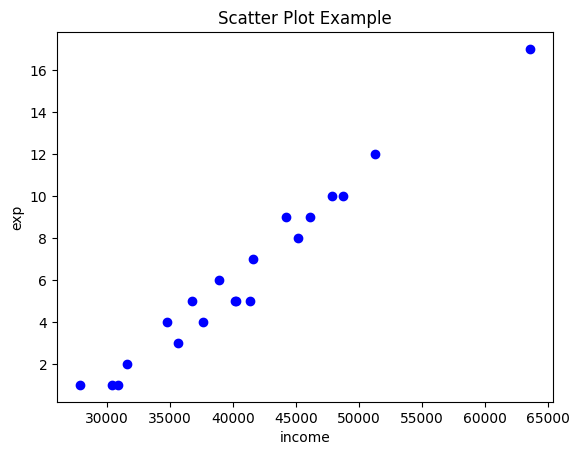

In [74]:
# Create scatter plot
plt.scatter(df['income'], df['experience'], color='blue', marker='o')

# Adding labels and title
plt.xlabel('income')
plt.ylabel('exp')
plt.title('Scatter Plot Example')

# Display the plot
plt.show()

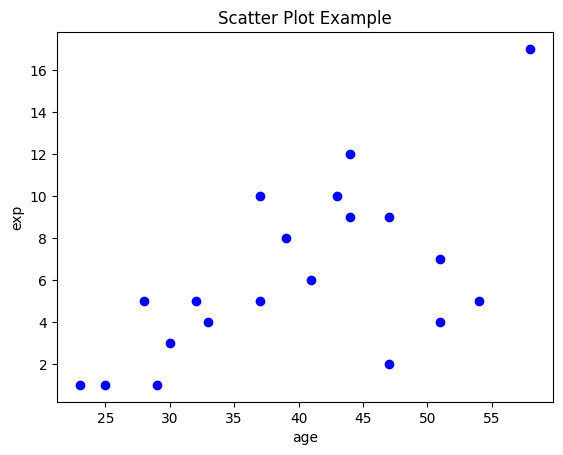

In [75]:
#checking the same on other variables

plt.scatter(df['age'], df['experience'], color='blue', marker='o')

# Adding labels and title
plt.xlabel('age')
plt.ylabel('exp')
plt.title('Scatter Plot Example')

# Display the plot
plt.show()

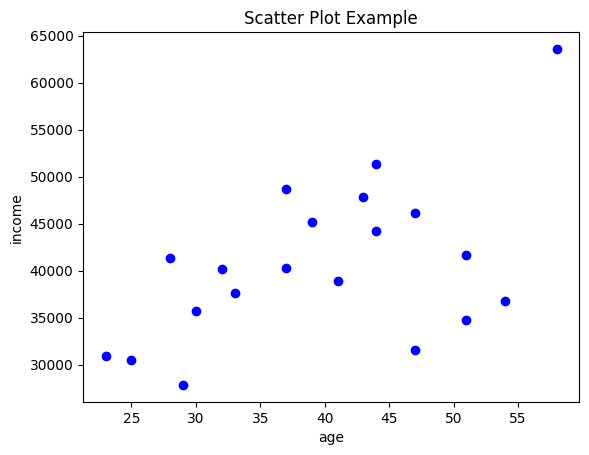

In [76]:

# Create scatter plot
plt.scatter(df['age'], df['income'], color='blue', marker='o')

# Adding labels and title
plt.xlabel('age')
plt.ylabel('income')
plt.title('Scatter Plot Example')

# Display the plot
plt.show()

Mean Squared Error: 1264016.0265139719
R-squared: 0.9217045189228629
Intercept: 31023.677620468534
Coefficients: [2164.65969115  -95.08384765]


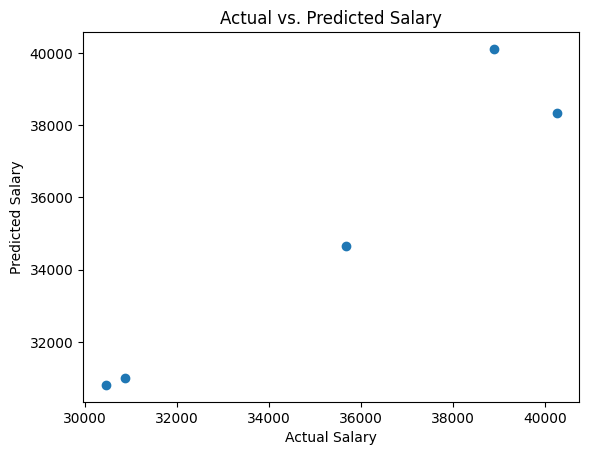

In [77]:

# Assuming your columns are 'age', 'income', 'experience', and 'salary'
X = df[['experience', 'age']]
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary")
plt.show()


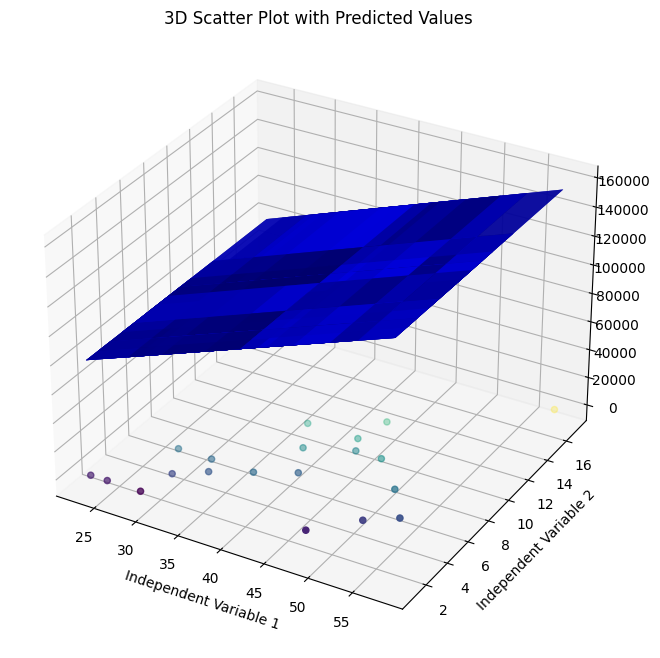

In [78]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['experience'], c=df['income'], marker='o', label='Predicted')

# Add the regression plane
xx, yy = np.meshgrid(df['age'], df['experience'])
zz = model.coef_[0] * xx + model.coef_[1] * yy + model.intercept_

ax.plot_surface(xx, yy, zz, alpha=0.5, color='blue')

# Set labels and title
ax.set_xlabel('AGE')
ax.set_ylabel('EXP')

ax.set_title('3D Scatter Plot with Predicted Values')

# Display the plot
plt.show()

#Better One

In [83]:
df= pd.read_csv("/content/CarPrice_Assignment.csv")
#dataset link : https://www.kaggle.com/datasets/praveendj/carprice-analyze-linear-regression-rfe

Getting a jist of the data and Analyzing

In [84]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [86]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [87]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [88]:
df.shape

(205, 26)

In [89]:
#symboling column- Its assigned insurance risk rating,
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

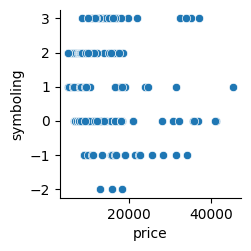

In [90]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = df)

Preprocessing

In [91]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [92]:
# creating a seperate column for company name
df["CompanyName"]= df["CarName"].apply((lambda x:x.split(' ')[0]))

In [93]:
df= df.drop(['CarName'],axis=1)

In [94]:
df['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [95]:
#fixing spelling mistake
df['CompanyName'].replace('toyouta', 'toyota',inplace=True)
df['CompanyName'].replace('Nissan', 'nissan',inplace=True)
df['CompanyName'].replace('maxda', 'mazda',inplace=True)
df['CompanyName'].replace('vokswagen', 'volkswagen',inplace=True)
df['CompanyName'].replace('vw', 'volkswagen',inplace=True)
df['CompanyName'].replace('porcshce', 'porsche',inplace=True)

In [96]:
#doornumber - Number of doors in a car
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [97]:
#converting the doornumer into Numeric datatype

def number_(x):
    return x.map({'four':4, 'two': 2})

df['doornumber'] = df[['doornumber']].apply(number_)

In [98]:
df['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [99]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [100]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

df['cylindernumber'] = df[['cylindernumber']].apply(convert_number)

In [101]:
df['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

Visualization

<ipython-input-102-76bbe61ff2f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wheelbase'])


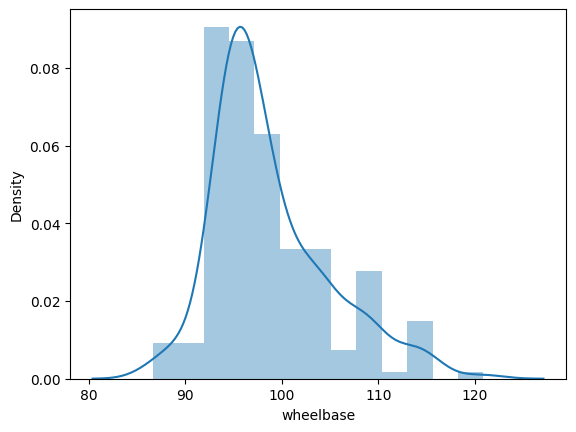

In [102]:
sns.distplot(df['wheelbase'])
plt.show()

<ipython-input-103-aef987d71b13>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carlength'])


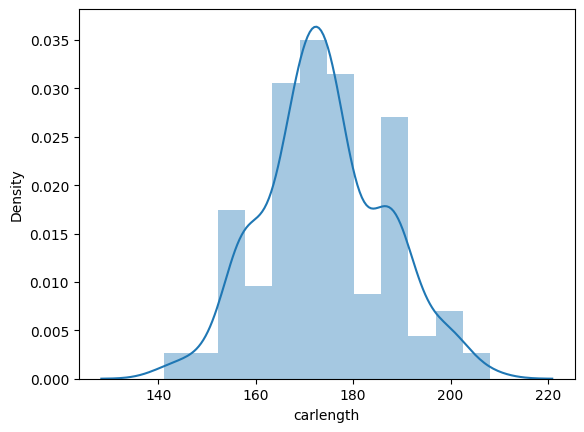

In [103]:
#carlength - Length of car
df['carlength'].value_counts().head()
sns.distplot(df['carlength'])
plt.show()

<ipython-input-104-d3d585d9438a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')


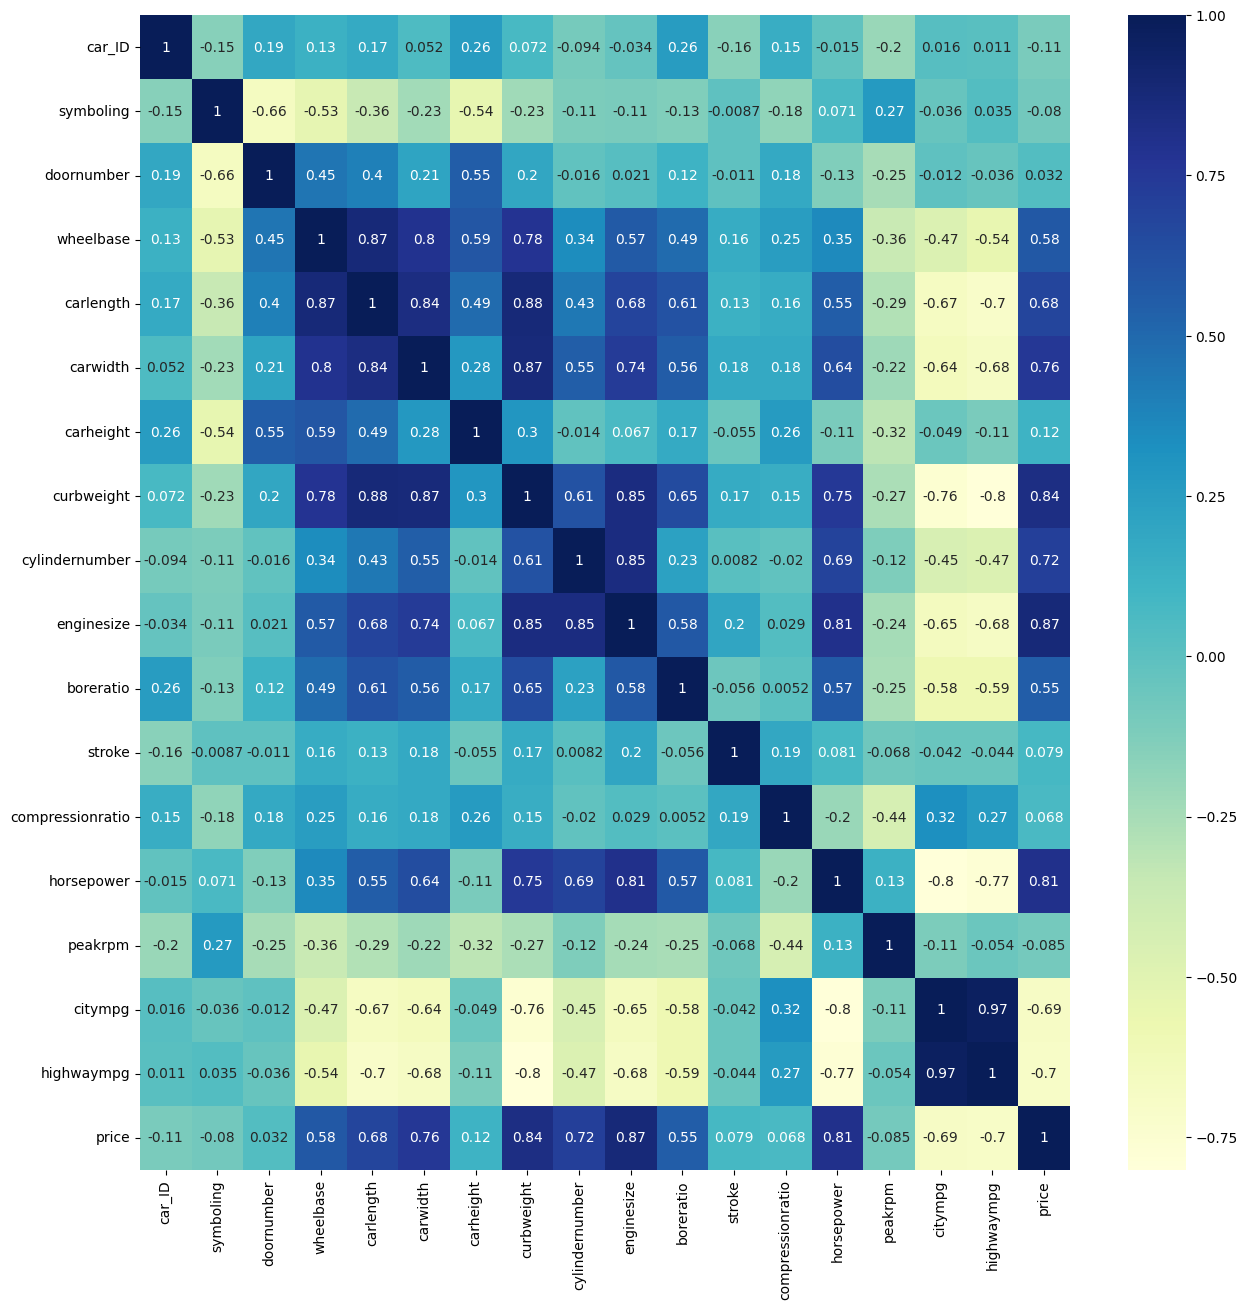

In [104]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

Talk on the correlation of the features


In [105]:
cars_numeric = df.select_dtypes(include =['int64','float64'])
cars_numeric.head()


,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [106]:
#creating dummies
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()


,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CompanyName
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [107]:
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
car_df  = pd.concat([df, cars_dummies], axis =1)

In [109]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'CompanyName'], axis =1)

In [110]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   doornumber              205 non-null    int64  
 3   wheelbase               205 non-null    float64
 4   carlength               205 non-null    float64
 5   carwidth                205 non-null    float64
 6   carheight               205 non-null    float64
 7   curbweight              205 non-null    int64  
 8   cylindernumber          205 non-null    int64  
 9   enginesize              205 non-null    int64  
 10  boreratio               205 non-null    float64
 11  stroke                  205 non-null    float64
 12  compressionratio        205 non-null    float64
 13  horsepower              205 non-null    int64  
 14  peakrpm                 205 non-null    in

In [111]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [112]:
df_train.shape

(143, 61)

In [113]:
df_test.shape

(62, 61)

Rescaling the data:


In [114]:
cars_numeric.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [115]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [116]:
scaler = StandardScaler()

In [117]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [118]:
y_train = df_train.pop('price')
X_train = df_train

In [119]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [120]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'CompanyName_bmw',
       'CompanyName_mazda', 'CompanyName_mitsubishi', 'CompanyName_peugeot',
       'CompanyName_renault', 'CompanyName_subaru'],
      dtype='object')

Model 1


In [121]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           4.59e-64
Time:                        06:51:22   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [122]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,CompanyName_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,CompanyName_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


We see that there are a few variables which have an infinite/large VIF. These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. So let's try and build a model with 10 features this time using RFE.

Model 2

In [123]:
#building the model with 10 variables
lr2 = LinearRegression()

rfe2 = RFE(lr2,n_features_to_select=5)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [124]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols

Index(['enginesize', 'enginelocation_rear', 'enginetype_rotor',
       'CompanyName_bmw', 'CompanyName_renault'],
      dtype='object')

In [125]:
X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [126]:

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           3.84e-52
Time:                        06:51:28   Log-Likelihood:                -73.260
No. Observations:                 143   AIC:                             158.5
Df Residuals:                     137   BIC:                             176.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0730    

In [127]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,enginesize,1.13
3,CompanyName_bmw,1.06
2,enginetype_rotor,1.05
1,enginelocation_rear,1.02
4,CompanyName_renault,1.00


In [128]:
y_train_pred = model_2.predict(X2_sm)
y_train_pred.head()

122   -0.636370
125    0.471249
166   -0.636370
1      0.032381
199    0.032381
dtype: float64

In [129]:
Residual = y_train- y_train_pred

<ipython-input-130-ae5c04af0e2b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Residual, bins =15)


<Axes: ylabel='Density'>

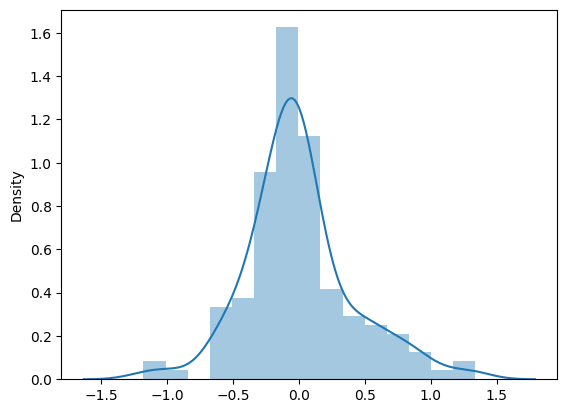

In [130]:
sns.distplot(Residual, bins =15)

In [131]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [132]:
y_test = df_test.pop('price')
X_test = df_test

In [133]:
final_cols = X2.columns

In [134]:
X_test_model2= X_test[final_cols]
X_test_model2.head()

,enginesize,enginelocation_rear,enginetype_rotor,CompanyName_bmw,CompanyName_renault
160,-0.660242,0,0,0,0
186,-0.390836,0,0,0,0
59,-0.072447,0,0,0,0
165,-0.660242,0,0,0,0
140,-0.415328,0,0,0,0


In [135]:
X_test_sm = sm.add_constant(X_test_model2)

In [136]:
y_pred = model_2.predict(X_test_sm)

In [137]:
y_pred.head()

160   -0.636370
186   -0.406487
59    -0.134807
165   -0.636370
140   -0.427385
dtype: float64

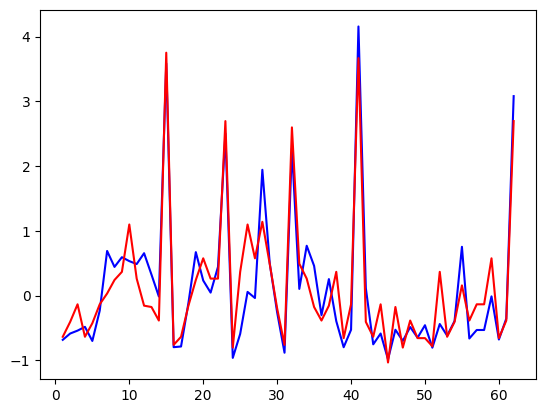

In [138]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')


In [149]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(df['enginesize'], df['CompanyName_bmw'],df['enginetype_rotor'],df['enginelocation_rear'],df['CompanyName_renault'] ,c=df['price'], marker='o', label='Predicted')

ax.scatter(df['enginesize'], df['CompanyName'],df['enginetype'],df['enginelocation'] ,c=df['price'], marker='o', label='Predicted')

# Add the regression plan
xx, yy = np.meshgrid(df['enginesize'], df['CompanyName'],df['enginetype'],df['enginelocation'])
# zz = model.coef_[0] * xx + model.coef_[1] * yy + model.intercept_
zz = model_2.intercept_ + \
     model_2.coef_[0] * xx + \
     model_2.coef_[1] * yy + \
     model_2.coef_[2] * df['enginetype'] + \
     model_2.coef_[3] * df['enginelocation']
ax.plot_surface(xx, yy, zz, alpha=0.5, color='blue')

# Set labels and title
ax.set_xlabel('enginesize')
ax.set_ylabel('CompanyName_bmw')
ax.set_ylabel('enginetype_rotor')
ax.set_ylabel('enginelocation_rear')
ax.set_ylabel('CompanyName_renault')

ax.set_title('3D Scatter Plot with Predicted Values')

# Display the plot
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Error in callback <function _draw_all_if_interactive at 0x78da3f4f2e60> (for post_execute):


AttributeError: 'Path3DCollection' object has no attribute '_offsets3d'

AttributeError: 'Path3DCollection' object has no attribute '_offsets3d'

<Figure size 1000x800 with 1 Axes>

In [ ]:
r_squ = r2_score(y_test,y_pred)
r_squ

#R

In [ ]:
library(dplyr)
library(MASS)

In [ ]:
df <- read.csv("/content/multiple_linear_regression_dataset.csv")

In [ ]:
str(df)

'data.frame':	20 obs. of  3 variables:
 $ age       : int  25 30 47 32 43 51 28 33 37 39 ...
 $ experience: int  1 3 2 5 10 7 5 4 5 8 ...
 $ income    : int  30450 35670 31580 40130 47830 41630 41340 37650 40250 45150 ...


In [ ]:
summary(df)

      age          experience        income     
 Min.   :23.00   Min.   : 1.00   Min.   :27840  
 1st Qu.:31.50   1st Qu.: 3.75   1st Qu.:35452  
 Median :40.00   Median : 5.00   Median :40190  
 Mean   :39.65   Mean   : 6.20   Mean   :40736  
 3rd Qu.:47.00   3rd Qu.: 9.00   3rd Qu.:45390  
 Max.   :58.00   Max.   :17.00   Max.   :63600  

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:

# Split the data into training and testing sets
set.seed(123)
train_indices <- sample(1:nrow(df), 0.7 * nrow(df))
train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]


In [ ]:
# Fit a multiple linear regression model
lm_model <- lm(age ~ ., data = train_data)

In [ ]:
# Summary of the model
summary(lm_model)



Call:
lm(formula = age ~ ., data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.059 -5.201 -2.265  5.075 11.979 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 86.688261  41.974388   2.065   0.0633 .
experience   5.365602   3.079049   1.743   0.1092  
income      -0.001976   0.001493  -1.323   0.2127  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.678 on 11 degrees of freedom
Multiple R-squared:  0.4801,	Adjusted R-squared:  0.3856 
F-statistic: 5.079 on 2 and 11 DF,  p-value: 0.02738


In [ ]:
# Make predictions on the test set
predictions <- predict(lm_model, newdata = test_data)

In [ ]:
# Evaluate the model
rmse <- sqrt(mean((predictions - test_data$age)^2))
print(paste("Root Mean Squared Error (RMSE):", rmse))

[1] "Root Mean Squared Error (RMSE): 6.37103574214984"
